
# Aqar Real Estate EDA


By: Turki Alsaedi, Yousef Alotaibi, Ahmed Almohammed, Lana Almorabah, Mohammed Alsalamah

---
*Short description here*



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# support arabic plotting
import arabic_reshaper # pip install arabic-reshaper
from bidi.algorithm import get_display # pip install python-bidi


In [3]:
# read in the dataset
data = pd.read_csv("SA_Aqar.csv")

In [3]:
# look at the head
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [4]:
data.describe()
# how come there are apratements with size = 1

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [5]:
data["district"].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [6]:
data.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [7]:
# a closer look at the features of the dataset
data_columns = {}
for column in data.columns:
  key = column
  if data[column].nunique() > 5:
    value = data[column].nunique()
  else:
    value = (data[column].nunique(), list(data[column].unique()))
  data_columns[key] = value

len(data_columns), data_columns

(24,
 {'city': (4, [' الرياض', ' جدة', ' الدمام', ' الخبر']),
  'district': 174,
  'front': 10,
  'size': 199,
  'property_age': 36,
  'bedrooms': 7,
  'bathrooms': (5, [5, 4, 3, 2, 1]),
  'livingrooms': (5, [1, 2, 3, 4, 5]),
  'kitchen': (2, [1, 0]),
  'garage': (2, [1, 0]),
  'driver_room': (2, [0, 1]),
  'maid_room': (2, [1, 0]),
  'furnished': (2, [0, 1]),
  'ac': (2, [0, 1]),
  'roof': (2, [0, 1]),
  'pool': (2, [0, 1]),
  'frontyard': (2, [1, 0]),
  'basement': (2, [0, 1]),
  'duplex': (2, [1, 0]),
  'stairs': (2, [1, 0]),
  'elevator': (2, [0, 1]),
  'fireplace': (2, [0, 1]),
  'price': 113,
  'details': 1429})

### Questions to ask:

* Which city has the highest rent rate?
* Does the district within a city play a role in increasing the rent rate?
* Do the number of various features within a house increase its rent rate?
* Which has a higher impact on the rent price: location or features?

In [8]:
data["city"].values, data["district"].values, data["front"].values

(array([' الرياض', ' الرياض', ' الرياض', ..., ' الخبر', ' الخبر', ' الخبر'],
       dtype=object),
 array(['   حي العارض ', '   حي القادسية ', '   حي القادسية ', ...,
        '   حي اللؤلؤ ', '   حي الكورنيش ', '   حي الامواج '], dtype=object),
 array(['شمال', 'جنوب', 'جنوب', ..., 'غرب', 'جنوب', 'غرب'], dtype=object))

In [9]:
# this works because we added the space in the words

# city
print(f'Number of observations with (الرياض ): {len(data[data["city"] == " الرياض"])}')
# district
print(f'Number of observations with ( حي العليا): {len(data[data["district"] == "   حي العليا "])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')


Number of observations with (الرياض ): 960
Number of observations with ( حي العليا): 80
Number of observations with (غرب): 771


In [10]:
# but this doesnt work for some because we didnt add the space

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 0
Number of observations with (حي العليا): 0
Number of observations with (غرب): 771


In [32]:
# fix the space surrounding the words
nonnumeric_columns = ["city", "district", "front"]

for column in nonnumeric_columns:
    data[column] = data[column].apply(lambda x: x.strip())

In [12]:
# check if stripping the space worked

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district
print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 960
Number of observations with (حي العليا): 80
Number of observations with (غرب): 771


Great now we continue with exploring the data, lets study the effect a city has on its rent prices

In [113]:
# make a function to plot arabic labels
def plot_arabic(labelsSeries: pd.Series):
    """
    A function that plots arabic literals in their required format instead of just floating letters
    \nArgs:
     - labelsSeries: a series of arabic labels 
    \nReturns:
     - result: a list of properly formatted arabic labels
    """

    # apply the reshaping method
    arabicLabels = labelsSeries.apply(arabic_reshaper.reshape)

    # initiate the formatting process
    result = []
    for label in arabicLabels:
        result.append(get_display(label))
    
    # return the formatted labels as a list if there are more than one value
    if len(result) == 1:
        return result[0]
    else:
        return result

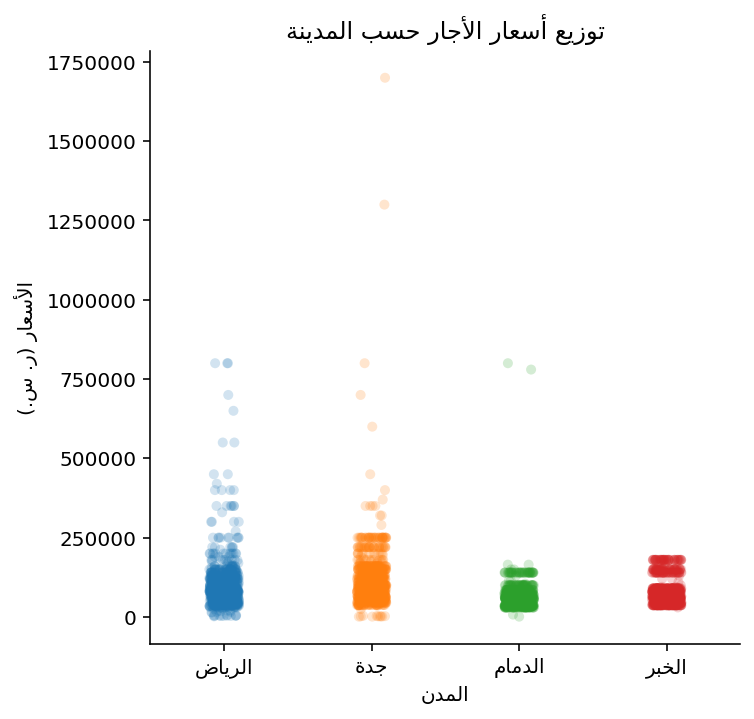

In [14]:
# catplot
sns.catplot(y="price", x=plot_arabic(data["city"]), data=data, alpha=0.2)
plt.ylabel(plot_arabic(pd.Series("الأسعار (ر. س.)")))
plt.xlabel(plot_arabic(pd.Series("المدن")))
plt.title(plot_arabic(pd.Series("توزيع أسعار الأجار حسب المدينة")))
plt.ticklabel_format(style='plain', axis='y')

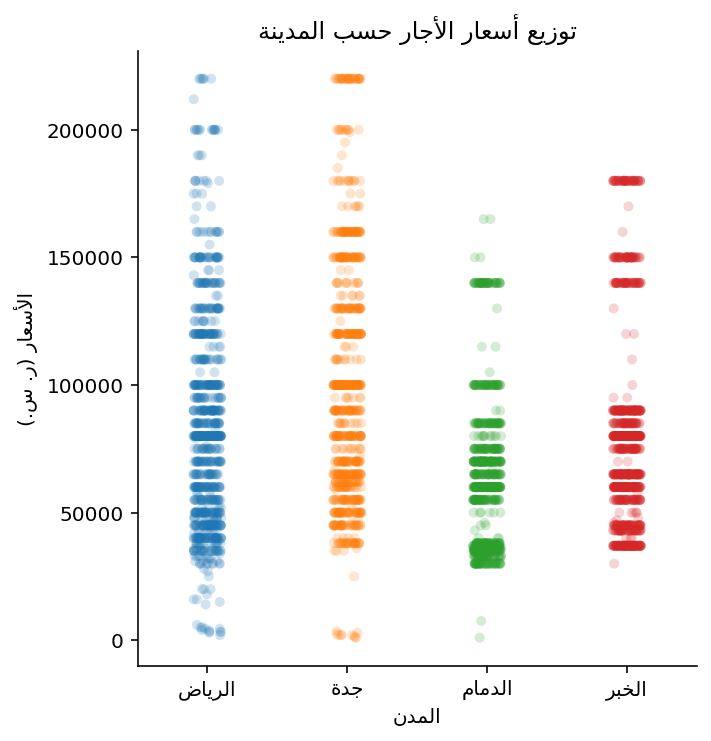

In [15]:
# catplot for prices < 250,000 SR
d = data[data["price"] < 250000]
sns.catplot(y="price", x=plot_arabic(d["city"]), data=d, alpha=0.2)
plt.ylabel(plot_arabic(pd.Series("الأسعار (ر. س.)")))
plt.xlabel(plot_arabic(pd.Series("المدن")))
plt.title(plot_arabic(pd.Series("توزيع أسعار الأجار حسب المدينة")))
plt.ticklabel_format(style='plain', axis='y')

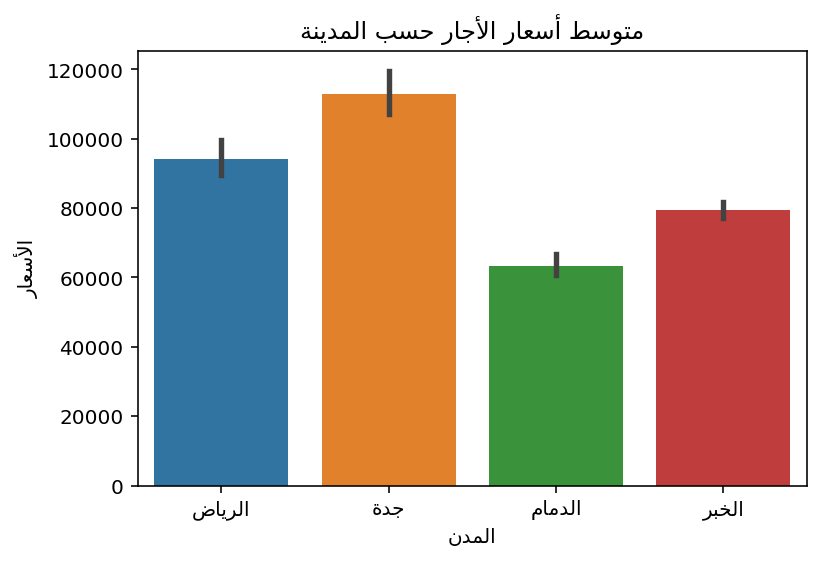

In [16]:
# scatter plt
plt.title(plot_arabic(pd.Series("متوسط أسعار الأجار حسب المدينة")))
sns.barplot(y = "price", x=plot_arabic(data["city"]), data=data)
plt.ylabel(plot_arabic(pd.Series("الأسعار")))
plt.xlabel(plot_arabic(pd.Series("المدن")));


Mohammed

Yousef

Turki

In [132]:
data.head(2)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...


In [110]:
d1 = data[(data['duplex'] == 1) & (data['size'] < 1000) & (data['price'] < 300000)]
d1

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...
5,الرياض,حي الازدهار,شرق,250,25,5,4,1,1,0,...,0,0,1,0,1,1,0,0,45000,الفيلا في حي الازدهار \nتتكون من مجلس رجال في ...
6,الرياض,حي المهدية,شمال,250,0,5,5,3,1,1,...,0,0,0,0,1,1,0,0,45000,دبلكس مساحه ٢٥٠\nحي المهديه\nدفع كل ٦ شهور
7,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,الخبر,حي اللؤلؤ,غرب,437,0,7,5,2,1,1,...,1,0,1,0,1,1,0,1,60000,للإيجار فيلا دورين وملحق في حي الأصداف\n\nالمس...
3714,الخبر,حي الصواري,جنوب,400,0,5,5,3,0,1,...,1,0,1,0,1,1,0,0,55000,دبلكس للأيجار حي الصواري ج ٤٣\n\nمجلس خارجي (د...
3715,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...
3716,الخبر,حي الكورنيش,جنوب,300,13,6,5,2,1,1,...,0,0,1,0,1,1,0,0,90000,فيلا فاخرة في حي كورنيش الخبر. أفضل حي بالخبر....


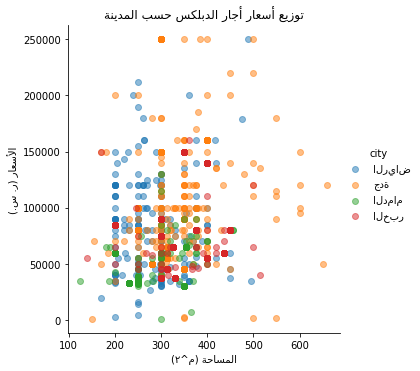

In [130]:
sns.lmplot(x='size', y='price', data=d1, hue='city', fit_reg=False, scatter_kws={'alpha':0.5})
plt.ylabel(plot_arabic(pd.Series("الأسعار (ر. س.)")))
plt.xlabel(plot_arabic(pd.Series("المساحة (م^٢)")))
plt.title(plot_arabic(pd.Series("توزيع أسعار أجار الدبلكس حسب المدينة")));

Ahmed

Lana